<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Financial Theory with Python
**&mdash;A Gentle Introduction**

Dr Yves J Hilpisch | The Python Quants | The AI Machine

http://tpq.io | http://aimachine.io | [@dyjh](http://twitter.com/dyjh)

<img src="https://hilpisch.com/finpy_cover.png" width=30% border=1px align=left>

## Chapter 04 &mdash; Optimality and Equilibrium

## Utility Maximization

In [1]:
def u(c):
    return -c[0] * c[1]

In [2]:
w = 10

In [3]:
from scipy.optimize import minimize

In [4]:
cons = ({'type': 'eq', 'fun': lambda c: c[0] + c[1] - w})

In [5]:
opt = minimize(u, (1, 1), constraints=cons)

In [6]:
opt

     fun: -24.999999999999996
     jac: array([-5., -5.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([5., 5.])

In [7]:
opt['x']

array([5., 5.])

In [8]:
-opt['fun'] 

24.999999999999996

In [9]:
def iu(u, c0):
    return u / c0

In [10]:
def c1(c0):
    return w - c0

In [11]:
import numpy as np
np.set_printoptions(precision=5)

In [12]:
from pylab import mpl, plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_formats = ['svg']

In [13]:
c0 = np.linspace(1, w)

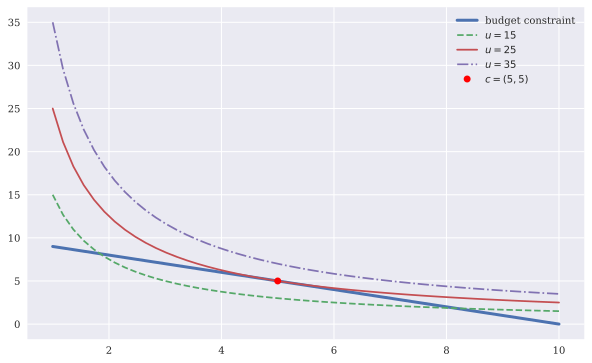

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(c0, c1(c0), label='budget constraint', lw=3.0)
plt.plot(c0, iu(15, c0), '--', label='$u=15$')
plt.plot(c0, iu(25, c0), label='$u=25$')
plt.plot(c0, iu(35, c0), '-.', label='$u=35$')
plt.plot(opt['x'][0], opt['x'][1], 'ro', label='$c=(5, 5)$')
plt.legend(loc=0);

## Logarithmic Function

In [15]:
x = np.linspace(0.5, 10, 50)

In [16]:
x[:5]

array([0.5    , 0.69388, 0.88776, 1.08163, 1.27551])

In [17]:
u = np.log(x)

In [18]:
u1 = 1 / x

In [19]:
u2 = -1 / x ** 2

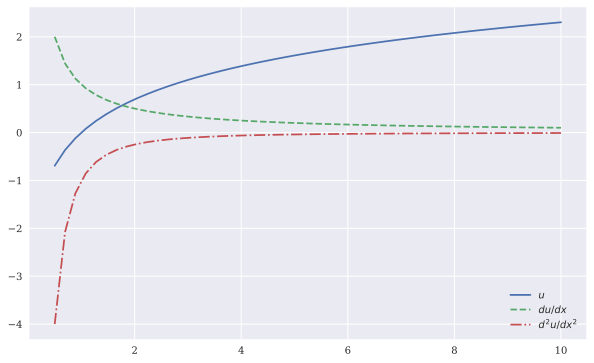

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(x, u, label='$u$')
plt.plot(x, u1, '--', label='$du/dx$')
plt.plot(x, u2, '-.', label='$d^2u/dx^2$')
plt.legend(loc=0);

## Time-Additive Utility

In [21]:
import math

In [22]:
from scipy.optimize import minimize

In [23]:
kappa = 10 / 11

In [24]:
def U(c):
    return -(math.log(c[0]) +  kappa * math.log(c[1]))

In [25]:
w = 10

In [26]:
cons = ({'type': 'eq', 'fun': lambda c: c[0] + c[1] - w})

In [27]:
opt = minimize(U, (1, 1), constraints=cons)

In [28]:
opt

     fun: -3.0747286083026886
     jac: array([-0.19091, -0.19091])
 message: 'Optimization terminated successfully'
    nfev: 18
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([5.23811, 4.76189])

In [29]:
opt['x']

array([5.23811, 4.76189])

In [30]:
-opt['fun']

3.0747286083026886

## Optimal Investment Portfolio

In [31]:
B = (10, (11, 11))

In [32]:
S = (10, (20, 5))

In [33]:
M0 = np.array((B[0], S[0]))

In [34]:
M = np.array((B[1], S[1])).T

In [35]:
p = 0.5

In [36]:
P = np.array((p, 1-p))

In [37]:
def U(phi):
    c1 = np.dot(M, phi)
    return -np.dot(P, np.log(c1))

In [38]:
-U((1, 0))

2.3978952727983707

In [39]:
-U((0, 1))

2.3025850929940455

In [40]:
-U((0.5, 0.5))

2.410140782802518

In [41]:
w = 10

In [42]:
cons = ({'type': 'eq',
         'fun': lambda phi: np.dot(M0, phi) - w})

In [43]:
opt = minimize(U, (1, 1), constraints=cons)

In [44]:
opt

     fun: -2.4183062699261972
     jac: array([-1.     , -0.99999])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.69442, 0.30558])

In [45]:
opt['x']

array([0.69442, 0.30558])

In [46]:
-opt['fun']

2.4183062699261972

In [47]:
-U(opt['x'])

2.4183062699261972

In [48]:
np.dot(M, opt['x'])

array([13.75022,  9.16652])

## Time-Additive Expected Utility

In [49]:
M0 = np.array((1, B[0], S[0]))

In [50]:
kappa = 10 / 11

In [51]:
def U(phi):
    c0 = phi[0]
    c1 = np.dot(M, phi[1:])
    return -(np.log(c0) + kappa * np.dot(P, np.log(c1)))

In [52]:
opt = minimize(U, (1, 1, 1), constraints=cons)

In [53]:
opt

     fun: -3.1799295980286093
     jac: array([-0.19088, -1.90932, -1.90974])
 message: 'Optimization terminated successfully'
    nfev: 32
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([5.23899, 0.33087, 0.14523])

In [54]:
-opt['fun']

3.1799295980286093

In [55]:
opt['x'][0]

5.23898714830318

In [56]:
np.dot(M, opt['x'][1:])

array([6.54422, 4.36571])

## A Numerical Example I

In [57]:
p = 1 / 3

In [58]:
P = np.array((p, (1-p)))

In [59]:
B1 = np.array((11, 11))

In [60]:
S1 = np.array((20, 5))

In [61]:
zeta = np.dot(S1 / (B1 + S1), P) / np.dot(B1 / (B1 + S1), P)

In [62]:
zeta

0.7342657342657343

In [63]:
w = 15

In [64]:
B0 = w / (1 + zeta)

In [65]:
B0

8.649193548387098

In [66]:
S0 = zeta * B0

In [67]:
S0

6.350806451612904

In [68]:
B0 + S0

15.000000000000002

In [69]:
i = B1.mean() / B0 - 1

In [70]:
i

0.2717948717948717

In [71]:
mu = np.dot(S1, P) / S0 - 1

In [72]:
mu

0.5746031746031743

In [73]:
import sympy as sy

In [74]:
q = sy.Symbol('q')

In [75]:
eq = (q * 20 + (1 - q) * 5) / (1 + i) - S0

In [76]:
eq

11.7943548387097*q - 2.41935483870968

In [77]:
q = sy.solve(eq)[0]

In [78]:
q

0.205128205128205

In [79]:
Q = np.array((q, 1-q))

In [80]:
np.dot(B1, Q) / (1 + i)

8.64919354838710

In [81]:
np.dot(S1, Q) / (1 + i)

6.35080645161290

## Pricing in Incomplete Markets

In [82]:
p = 1 / 3

In [83]:
P = np.array((p, p, p))

In [84]:
B1 = np.array((11, 11, 11))

In [85]:
S1 = np.array((20, 10, 5))

In [86]:
zeta = np.dot(S1 / (B1 + S1), P) / np.dot(B1 / (B1 + S1), P)

In [87]:
zeta

0.9155274934101636

In [88]:
w = 15

In [89]:
B0 = w / (1 + zeta)

In [90]:
B0

7.8307411674347165

In [91]:
S0 = zeta * B0

In [92]:
S0

7.169258832565284

In [93]:
B0 + S0

15.0

In [94]:
i = B1.mean() / B0 - 1

In [95]:
i

0.40472016183411985

In [96]:
mu = np.dot(S1, P) / S0 - 1

In [97]:
mu

0.6273183796451287

## Martingale Measures in Incomplete Markets

In [98]:
qu = sy.Symbol('qu')
qm = sy.Symbol('qm')

In [99]:
eq = (qu * 20 + qm * 10 + (1 - qu - qm) * 5) / (1 + i) - S0

In [100]:
eq

3.55942780337942*qm + 10.6782834101383*qu - 3.60983102918587

In [101]:
Q = sy.solve(eq, set=True)

In [102]:
Q

([qm], {(1.01416048550236 - 3.00000000000001*qu,)})

## A Numerical Example II

In [103]:
p = 1 / 3

In [104]:
P = np.array((p, p, p))

In [105]:
B1 = np.array((11, 11, 11))

In [106]:
S1 = np.array((20, 10, 5))

In [107]:
C1 = np.array((5, 0, 0))

In [108]:
zeta_1 = (np.dot(S1 / (B1 + S1 + C1), P) /
          np.dot(B1 / (B1 + S1 + C1), P))

In [109]:
zeta_1

0.8862001308044474

In [110]:
zeta_2 = (np.dot(C1 / (B1 + S1 + C1), P) /
          np.dot(B1 / (B1 + S1 + C1), P))

In [111]:
zeta_2

0.09156311314584695

In [112]:
w = 15

In [113]:
B0 = w / (1 + zeta_1 + zeta_2)

In [114]:
B0

7.584325396825396

In [115]:
S0 = zeta_1 * B0

In [116]:
S0

6.721230158730158

In [117]:
C0 = zeta_2 * B0

In [118]:
C0

0.6944444444444443

In [119]:
B0 + S0 + C0

14.999999999999998

In [120]:
i = B1.mean() / B0 - 1

In [121]:
i

0.45035971223021587

In [122]:
muS = np.dot(S1, P) / S0 - 1

In [123]:
muS

0.7357933579335794

In [124]:
muC = np.dot(C1, P) / C0 - 1

In [125]:
muC

1.4000000000000004

In [126]:
M = np.array((B1, S1, C1)).T

In [127]:
M

array([[11, 20,  5],
       [11, 10,  0],
       [11,  5,  0]])

In [128]:
M0 = np.array((B0, S0, C0))

In [129]:
Q = np.linalg.solve(M.T / (1 + i), M0)

In [130]:
Q

array([0.20144, 0.34532, 0.45324])

In [131]:
sum(Q)

1.0

In [132]:
np.allclose(np.dot(M.T, Q), M0 * (1 + i))

True

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>